In [5]:
import numpy as np
from itertools import permutations 
from matplotlib import pyplot as plt
from scipy.spatial import distance_matrix

In [2]:
!curl -LJO https://raw.githubusercontent.com/zhangky12/TSP_RL_Q/master/wi29.tsp.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   944  100   944    0     0    858      0  0:00:01  0:00:01 --:--:--   859


In [6]:
f = open("wi29.tsp.txt", "r")

In [7]:
number = 11

In [8]:
cities_loc = []
count = 0
for x in f:
  if count == number:
    break
  if x[0].isnumeric():
    count += 1
    location = x.split(' ')
    cities_loc.append([float(location[1]), float(location[2])])

In [9]:
matrix = distance_matrix(cities_loc, cities_loc)

In [10]:
vertices = [i for i in range(number)]
permut_all = list(permutations(vertices, number))
permut = [permut_all[i] for i in range(len(permut_all)) if permut_all[i][0] == 0 and permut_all[i]]

In [11]:
min_length = float('inf')
for i in range(len(permut)):
  cur_length = 0
  for j in range(len(permut[i])-1):
    cur_length += matrix[permut[i][j]][permut[i][j+1]]
  cur_length += matrix[permut[i][j+1]][0]
  if cur_length < min_length:
    min_permut = permut[i]
    min_length = cur_length

In [12]:
min_length

12518.033591455196

In [13]:
min_permut

(0, 4, 3, 2, 6, 8, 7, 9, 10, 5, 1)

In [ ]:
arranged_cities = []
for i in list(min_permut):
  arranged_cities.append(cities_loc[i])
arranged_cities.append(cities_loc[0])

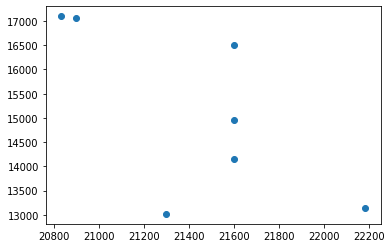

In [ ]:
plt.scatter([i[0] for i in cities_loc], [i[1] for i in cities_loc])

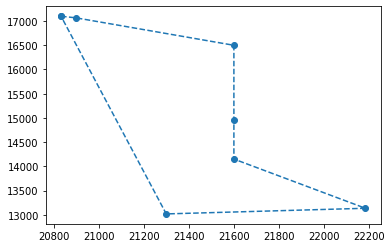

In [ ]:
plt.plot([i[0] for i in arranged_cities], [i[1] for i in arranged_cities], 
         'o',
         linestyle='dashed')